# Instagram Account Analysis Project

- **Data Analysis Journey**
  - **Data Analysis Process**
    - **Asking Questions (Objectives)**
    - **Data Wrangling**
      - Gather Data
      - Assessing Data (Quality, Issues)
      - Cleaning Data (Fix Issues)
    - **Perform EDA (Exploratory Data Analysis)**
      - Statistics and Visuals
      - Discover Data Patterns
      - Understand Data Distribution
    - **Draw Conclusion (Summarize Findings)**
    - **Communicate Result (Share)**

- Columns
  
•	Impressions → Total times the post was seen.

•	From Home → Impressions from followers’ home feed.

•	From Hashtags → Impressions from hashtags used.

•	From Explore → Impressions from the Explore page.

•	From Other → Impressions from other sources (shares, profile, etc.).

•	Saves → Number of times the post was saved.

•	Comments → Number of comments on the post.

•	Shares → Number of times the post was shared.

•	Likes → Number of likes on the post.

•	Profile Visits → Number of profile visits from the post.

•	Follows → Number of follows gained from the post.

•	Caption → Text written with the post.

•	Hashtags → Hashtags used in the post.


**Questions to be answered**

Q1 -  Top post (Likes - Saves - Shares - Impressions - Comments - Profile Visits - Follows) and top source viewed from <br>
Q2 -  Sources percentage of impressions <br>
Q3 -  Engagements Rate Percentage <br>
Q4 -  Is there any relation between impressions and ( Likes, Saves , Follows, Shares) <br>
Q5 -  Which factor has the strongest impact on Impressions: Shares, Likes, or Comments, saves?<br>
Q6 -  Does Hashtags count affects the Impressions?<br>
Q7 -  Does Caption count affects the Impressions?<br>
Q8 -  Does impressions effects engagements rate ? <br>
Q9 -  Is there any relation between Saves and Profile Visits<br>
Q10 - Is there any relation between Saves and Followers<br>
Q11 - Is there any relation between shares and (likes , saves, Profile Visits, Follows)<br>
Q12 - Is there any relationship between likes and source ?<br>
Q13 - Is there any relationship between saves and source ?<br>
Q14 - Is there any relationship between Profile Visits and source ?<br>
Q15 - Is there any relationship between Engagements and source ?<br>
Q16 - Is there any relationship between shares and other matrics ? <br> 
Q17 - Is there any relationship between likes and other matrics ?<br>
Q18 - Is there any relationship between save and other matrics ? <br>
Q19 - Does the Caption count affects the number of likes? <br>
Q20 - Does the Hashtags count affects the number of likes? <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Data Wrangling

In [3]:
df = pd.read_csv(r"D:\Mostafa\Python Projects\Instagram-Account-Analysis-Project\Data\Instagram data.csv", encoding='latin-1')
pd.options.display.max_columns = None

In [4]:
df.head(1)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   

                                             Caption  \
0  Here are some of the most important data visua...   

                                            Hashtags  
0  #finance #money #business #investing #investme...

In [5]:
df.shape

(119, 13)

In [6]:
df.size

1547

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [8]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(17)

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

**Feature Engineering** 
-  Add caption_length column
- Add hashtags_length column
- Add Engagement column
- Add Engagement_Rate column
- Add Top_source column
- Add Post ID column
- Add Engagement_Rate_high_or_low column

In [12]:
df['Post ID'] = df.index

In [13]:
df.set_index('Post ID',inplace=True)

In [14]:
df = df.reset_index() 

In [15]:
df.head(3)

Post ID  Impressions  From Home  From Hashtags  From Explore  From Other  \
0        0         3920       2586           1028           619          56   
1        1         5394       2727           1838          1174          78   
2        2         4021       2085           1188             0         533   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...

In [16]:
df['Caption']

0      Here are some of the most important data visua...
1      Here are some of the best data science project...
2      Learn how to train a machine learning model an...
3      Heres how you can write a Python program to d...
4      Plotting annotations while visualizing your da...
                             ...                        
97     Here are some of the best data science certifi...
98     Clustering is a machine learning technique use...
99     Clustering music genres is a task of grouping ...
100    Here are some of the best data science certifi...
101    175 Python Projects with Source Code solved an...
Name: Caption, Length: 102, dtype: object

In [17]:
Caption_List = df['Caption'].str.split()

In [18]:
df['caption_length'] = Caption_List.str.len()

In [19]:
df.head(1)

Post ID  Impressions  From Home  From Hashtags  From Explore  From Other  \
0        0         3920       2586           1028           619          56   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   

                                             Caption  \
0  Here are some of the most important data visua...   

                                            Hashtags  caption_length  
0  #finance #money #business #investing #investme...              16

In [20]:
Hashtag_List = df['Hashtags'].str.replace('#', '').str.split()
df['hashtags_length'] = Hashtag_List.str.len()

In [21]:
df.head(3)

Post ID  Impressions  From Home  From Hashtags  From Explore  From Other  \
0        0         3920       2586           1028           619          56   
1        1         5394       2727           1838          1174          78   
2        2         4021       2085           1188             0         533   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   

                                            Hashtags  caption_length  \
0  #finance #money #business #investing #investme...              16   
1  #healthcare #health #covid #data #datascience ...              34   
2  #data #datascience #dataanalysis #dataanalytic...              20   

   hashtags_length  
0               22  
1               18  
2               18

In [22]:
df['Engagement'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']
df['Engagement_Rate'] = df['Engagement'] / df['Impressions']
df['Top_source'] = df[['From Home','From Hashtags','From Explore','From Other']].idxmax(axis = 1)

In [23]:
level_mean = df['Engagement_Rate'].mean()

def level(l):
    if l > level_mean :
        return "High"
    else:
        return "low"

In [24]:
df['Engagement_Rate_high_or_low'] = df['Engagement_Rate'].apply(level)

In [25]:
df.head(3)

Post ID  Impressions  From Home  From Hashtags  From Explore  From Other  \
0        0         3920       2586           1028           619          56   
1        1         5394       2727           1838          1174          78   
2        2         4021       2085           1188             0         533   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   

                                            Hashtags  caption_length  \
0  #finance #money #business #investing #investme...              16   
1  #healthcare #health #covid #data #datascience ...              34   
2  #data #datascience #dataanalysis #dataanalytic...              20   

   hashtags_length  Engagement  Engagement_Rate Top_source  \
0               22         274         0.069898  From Home   
1               18         439         0.081387  From Home   
2               18         184         0.045760  From Home   

  Engagement_Rate_high_or_low  
0                        High  
1                        High  
2                         low

## EDA

<Axes: xlabel='Post ID', ylabel='Likes'>

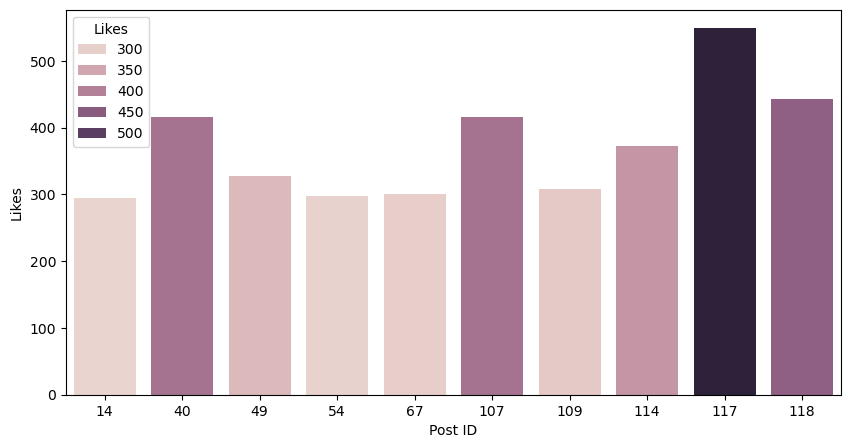

In [26]:
Top_10_posts = df.sort_values(by='Likes', ascending=False)[:10]

plt.figure(figsize=(10,5))

sns.barplot(x='Post ID', y='Likes', hue='Likes', data=Top_10_posts)

Top post got likes and Top source veiwed from

In [27]:
df.loc[df['Likes'] == df['Likes'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption    Top_source
100      117  Here are some of the best data science certifi...  From Explore

Highest post got likes veiwed the most from Explore

Top posts shared

<Axes: xlabel='Post ID', ylabel='Shares'>

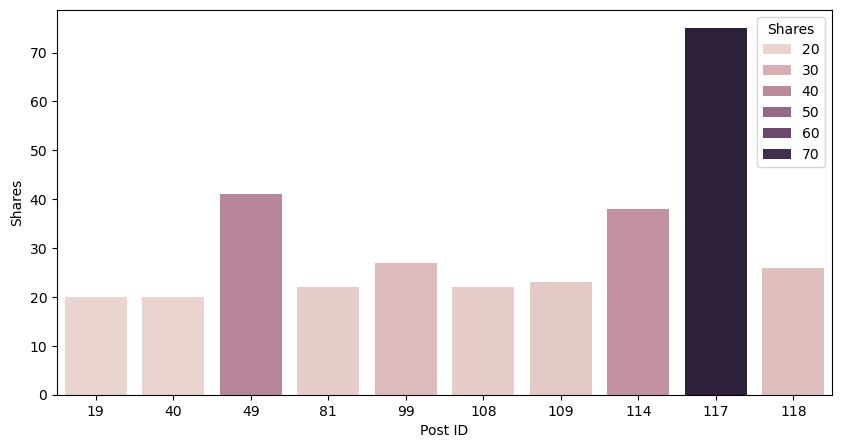

In [28]:
Top_10_posts_shared = df.sort_values(by='Shares', ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x='Post ID', y='Shares', hue='Shares', data=Top_10_posts_shared)

Top shared post and top source viewed from 

In [29]:
df.loc[df['Shares'] == df['Shares'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption    Top_source
100      117  Here are some of the best data science certifi...  From Explore

Highest post shared veiwed the most from Explore

Top 10 posts with high impression 

<Axes: xlabel='Post ID', ylabel='Impressions'>

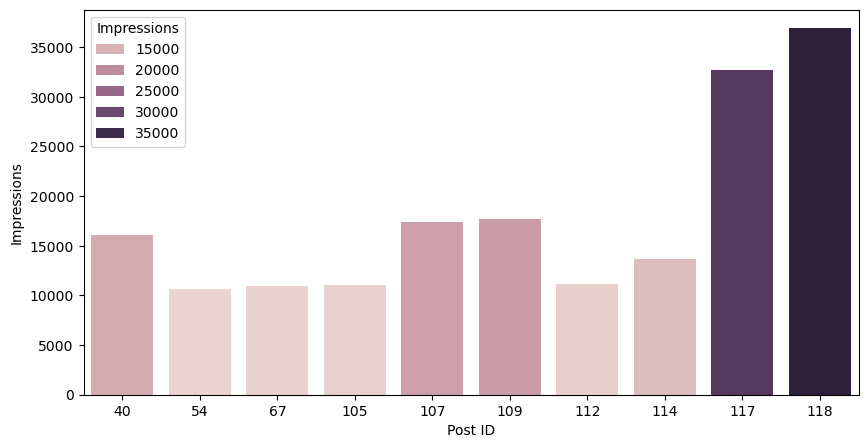

In [30]:
Top_10_posts_Impressions = df.sort_values(by='Impressions', ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x='Post ID', y='Impressions', hue='Impressions', data=Top_10_posts_Impressions)

TOP post with Impressions and top source viewed from

In [31]:
df.loc[df['Impressions'] == df['Impressions'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption    Top_source
101      118  175 Python Projects with Source Code solved an...  From Explore

Highest post impressions veiwed the most from Explore

Top posts brought followers

<Axes: xlabel='Post ID', ylabel='Follows'>

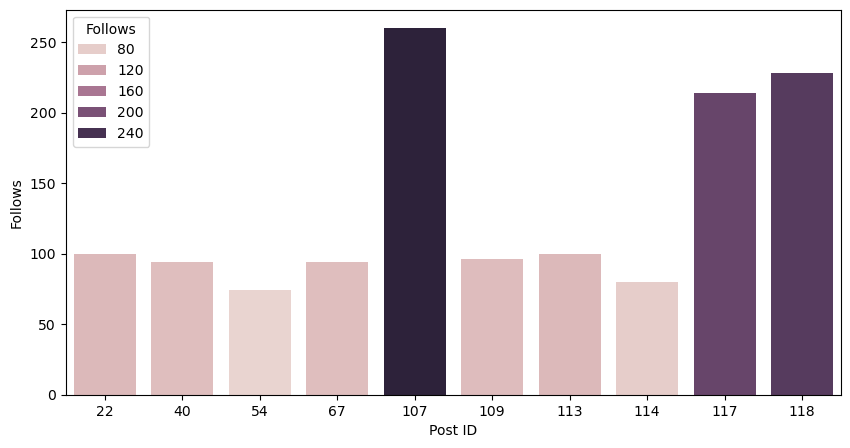

In [32]:
Top_10_posts_pv = df.sort_values(by='Follows', ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x='Post ID', y='Follows', hue='Follows', data=Top_10_posts_pv)

Top post bring followers and top source viewed from

In [33]:
df.loc[df['Follows'] == df['Follows'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption     Top_source
90      107  Here is a list of 100+ Machine Learning Algori...  From Hashtags

Highest post Bring Followers veiwed the most from Hashtags

Top post got comments and top source viewed from

In [34]:
df.loc[df['Comments'] == df['Comments'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption     Top_source
26       26  You must have heard or invested in any cryptoc...  From Hashtags

Top post got saves and top source viewed from

In [35]:
df.loc[df['Saves'] == df['Saves'].max(), ['Post ID', 'Caption','Top_source']]

Post ID                                            Caption    Top_source
100      117  Here are some of the best data science certifi...  From Explore

####################################################################################################################################

In [36]:
source_columns = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

In [37]:
source_totals = df[source_columns].sum().sort_values(ascending=False)

In [38]:
totals_df = source_totals.reset_index()

In [39]:
totals_df.columns = ['Source', 'Total Impressions']

In [40]:
totals_df

Source  Total Impressions
0      From Home             254685
1  From Hashtags             200765
2   From Explore             120214
3     From Other              18824

Top source

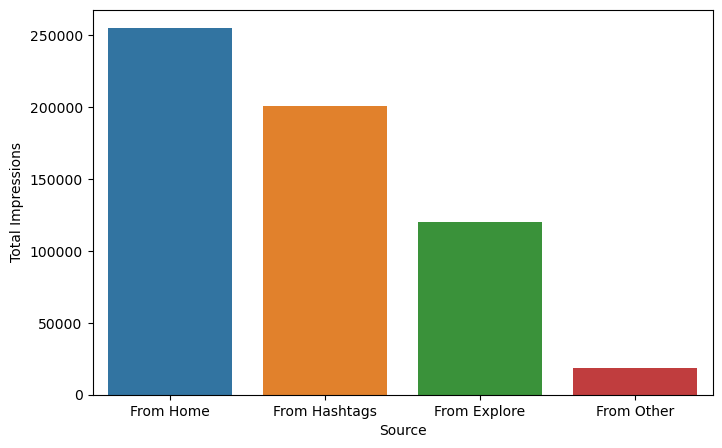

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(data = totals_df, x='Source', y='Total Impressions', hue='Source')
plt.ylabel("Total Impressions")
plt.xlabel("Source")
plt.show()

In [42]:
 px.pie(totals_df, names='Source',values='Total Impressions', title='Percentage of Impressions by Source',
        template='seaborn',width=700,height=400)

Home source and Hashtags is the highest

but Explore posts mades the highest Impressions, Engagement and Visits

In [43]:
Engagement_Rate_level = df['Engagement_Rate_high_or_low'].value_counts()

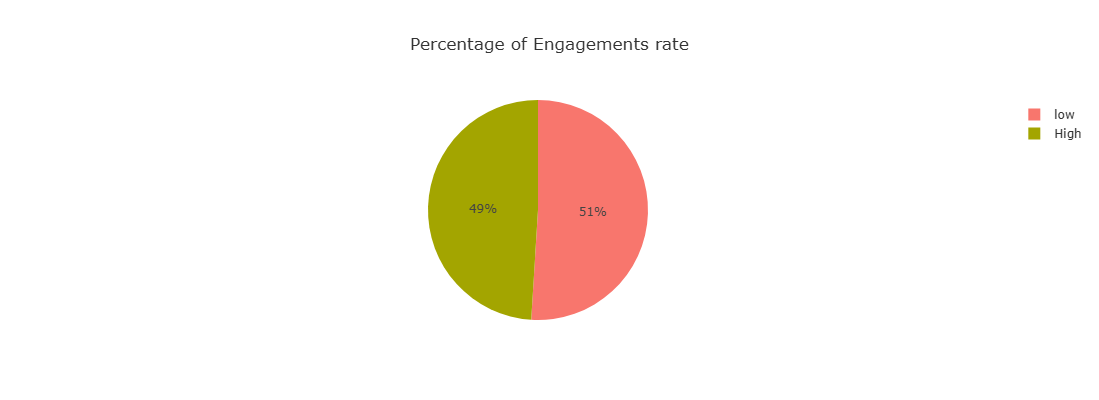

In [80]:
px.pie(names = Engagement_Rate_level.index,values = Engagement_Rate_level.values,
       title='Percentage of Engagements rate',template='ggplot2',width=700,height=400)

Inconsistent Engagement Rate

In [45]:
cols_toCheck = ['Impressions','Follows','Shares','hashtags_length','caption_length','Profile Visits','Likes','Comments','Saves',
                'Engagement','From Home', 'From Hashtags', 'From Explore', 'From Other']

In [46]:
df[cols_toCheck].corr()

Impressions   Follows    Shares  hashtags_length  \
Impressions         1.000000  0.889944  0.654920        -0.287391   
Follows             0.889944  1.000000  0.517278        -0.291992   
Shares              0.654920  0.517278  1.000000        -0.088770   
hashtags_length    -0.287391 -0.291992 -0.088770         1.000000   
caption_length     -0.091313 -0.071296 -0.219621         0.075737   
Profile Visits      0.762679  0.852748  0.265460        -0.300904   
Likes               0.852952  0.758234  0.718790        -0.329237   
Comments           -0.008535 -0.029298  0.012697        -0.009459   
Saves               0.791448  0.647585  0.874004        -0.269993   
Engagement          0.839993  0.707364  0.861283        -0.294505   
From Home           0.850210  0.676961  0.693729        -0.206597   
From Hashtags       0.547337  0.549309  0.211964        -0.237133   
From Explore        0.895021  0.795342  0.643606        -0.196105   
From Other          0.586628  0.537115  0.155730        -0.378977   

                 caption_length  Profile Visits     Likes  Comments     Saves  \
Impressions           -0.091313        0.762679  0.852952 -0.008535  0.791448   
Follows               -0.071296        0.852748  0.758234 -0.029298  0.647585   
Shares                -0.219621        0.265460  0.718790  0.012697  0.874004   
hashtags_length        0.075737       -0.300904 -0.329237 -0.009459 -0.269993   
caption_length         1.000000       -0.050540 -0.137358  0.094618 -0.208704   
Profile Visits        -0.050540        1.000000  0.642658  0.136590  0.377424   
Likes                 -0.137358        0.642658  1.000000  0.163383  0.843395   
Comments               0.094618        0.136590  0.163383  1.000000 -0.003695   
Saves                 -0.208704        0.377424  0.843395 -0.003695  1.000000   
Engagement            -0.191523        0.483198  0.930257  0.068998  0.981266   
From Home             -0.147808        0.537245  0.697192  0.002763  0.786382   
From Hashtags          0.099594        0.692433  0.667107  0.213391  0.285209   
From Explore          -0.140539        0.530046  0.655724 -0.152720  0.769341   
From Other            -0.147036        0.627791  0.388314 -0.081073  0.335213   

                 Engagement  From Home  From Hashtags  From Explore  \
Impressions        0.839993   0.850210       0.547337      0.895021   
Follows            0.707364   0.676961       0.549309      0.795342   
Shares             0.861283   0.693729       0.211964      0.643606   
hashtags_length   -0.294505  -0.206597      -0.237133     -0.196105   
caption_length    -0.191523  -0.147808       0.099594     -0.140539   
Profile Visits     0.483198   0.537245       0.692433      0.530046   
Likes              0.930257   0.697192       0.667107      0.655724   
Comments           0.068998   0.002763       0.213391     -0.152720   
Saves              0.981266   0.786382       0.285209      0.769341   
Engagement         1.000000   0.783897       0.430704      0.754091   
From Home          0.783897   1.000000       0.171849      0.805609   
From Hashtags      0.430704   0.171849       1.000000      0.177493   
From Explore       0.754091   0.805609       0.177493      1.000000   
From Other         0.359117   0.560149       0.210705      0.490258   

                 From Other  
Impressions        0.586628  
Follows            0.537115  
Shares             0.155730  
hashtags_length   -0.378977  
caption_length    -0.147036  
Profile Visits     0.627791  
Likes              0.388314  
Comments          -0.081073  
Saves              0.335213  
Engagement         0.359117  
From Home          0.560149  
From Hashtags      0.210705  
From Explore       0.490258  
From Other         1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

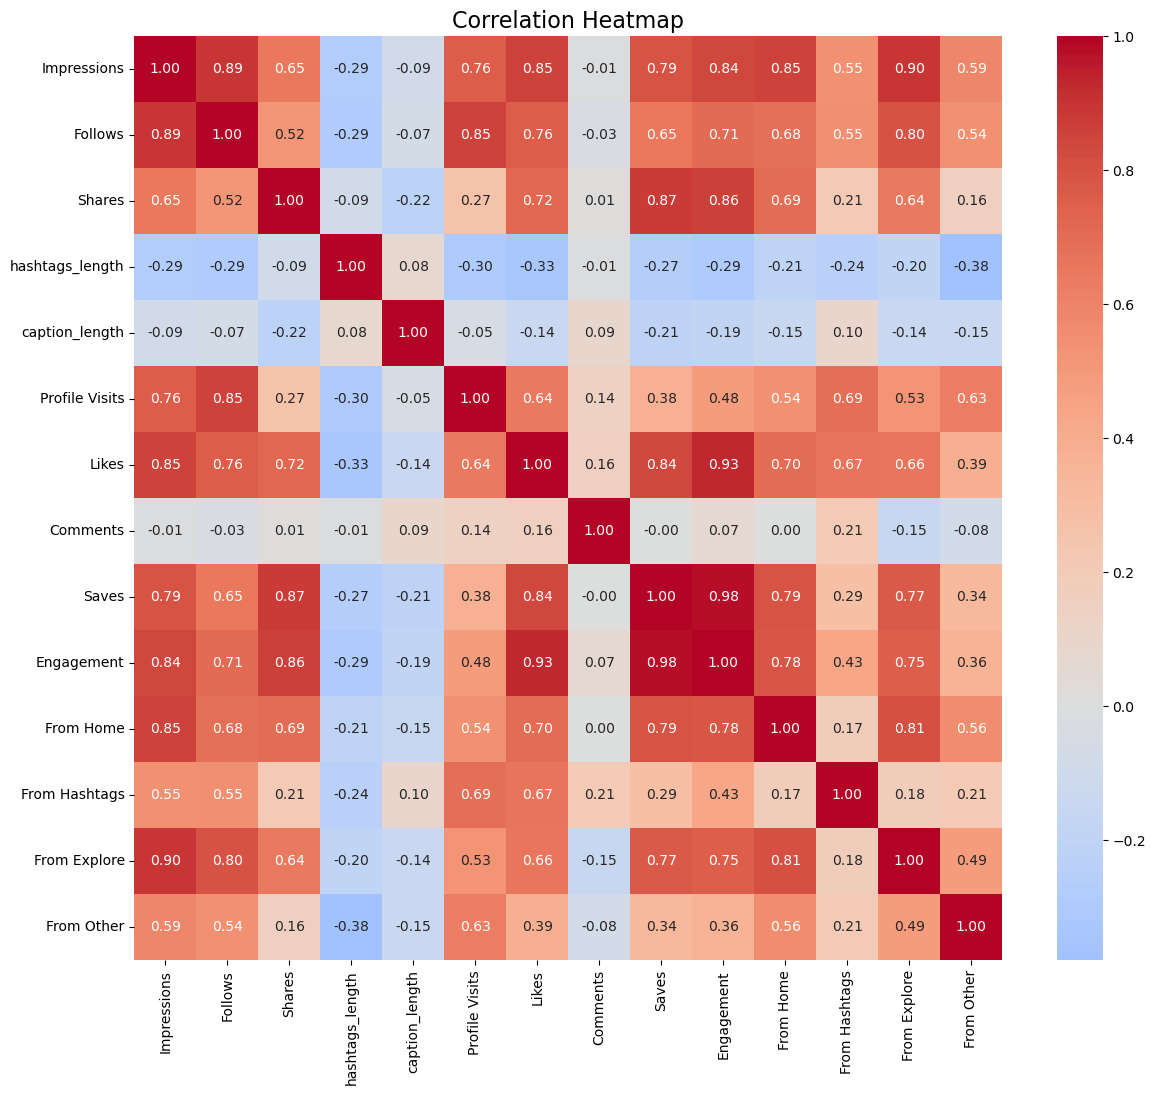

In [47]:
plt.figure(figsize=(14,12))

sns.heatmap(df[cols_toCheck].corr(),annot=True,cmap='coolwarm',fmt='.2f',center=0) 
plt.title('Correlation Heatmap', fontsize=16)

Very Strong Positive Relationships (0.80 to 1.00)

The strongest connections exist between core engagement metrics (Likes, Saves, Shares, Engagement) and reach metrics (Impressions, Follows, Profile Visits).

Reaching the From Explore and From Home feeds is a primary driver for Impressions and Follows.

Strong Positive Relationships (0.60 to 0.79)

Impressions show a strong correlation with Saves (0.79) and Shares (0.65).

Likes are strongly correlated with From Explore (0.66) and From Home (0.70).

Follows have a strong relationship with From Explore (0.80) and Saves (0.65).

Moderate Positive Relationships (0.40 to 0.59)

Profile Visits have a moderate relationship with Impressions (0.76), Likes (0.64), Saves (0.79), and reach from all sources (Home, Hashtags, Explore).

From Hashtags shows a moderate correlation with Impressions (0.55).

Weak Positive Relationships (0.10 to 0.39)

Comments have a weak positive relationship with From Hashtags (0.21) and Likes (0.16).

From Other sources show weak correlations with most other metrics.

Weak Negative Relationships (-0.10 to -0.39)

Hashtags Length and Caption Length generally have a weak negative correlation with most engagement and reach metrics, suggesting that longer captions 

and more hashtags do not necessarily improve performance and may slightly hinder it. For instance, Engagement & Hashtags Length (-0.29).

No Notable Relationship (near 0)

Comments show almost no linear relationship with most key metrics like Impressions (-0.01), Follows (0.03), Saves (-0.00), and Profile Visits (0.14).


charts

Relationship between Likes and Impressions

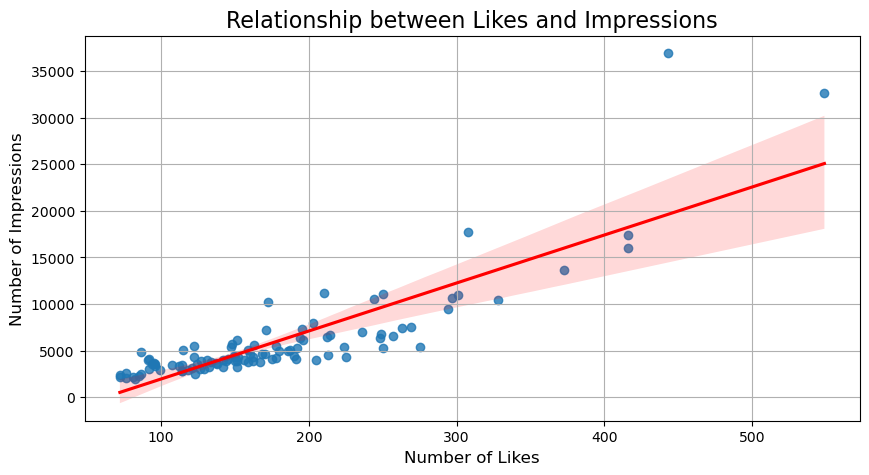

In [48]:
plt.figure(figsize=(10,5))
sns.regplot(x='Likes', y='Impressions', data=df, line_kws={'color':'red'})


plt.title('Relationship between Likes and Impressions', fontsize=16)
plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Number of Impressions', fontsize=12)
plt.grid(True)
plt.show()

There is a strong positive linear relationship between the Number of Likes and the Number of Impressions.

Relationship between Saves and Impressions

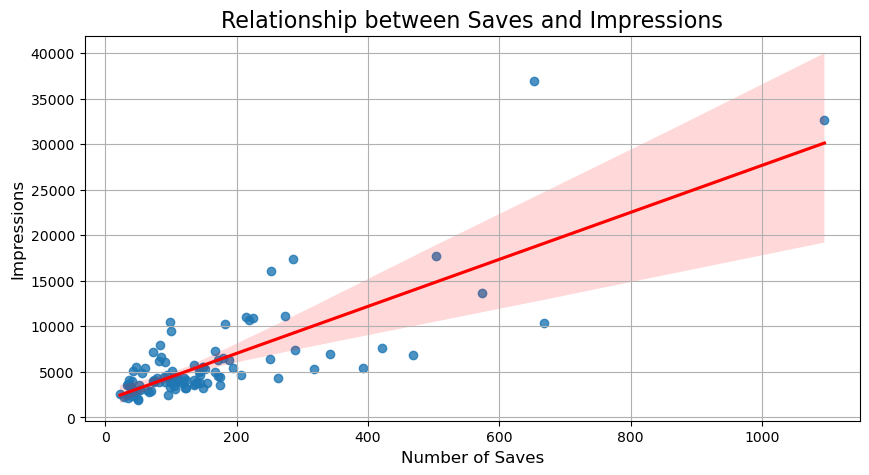

In [49]:
plt.figure(figsize=(10,5))
sns.regplot(x='Saves', y='Impressions', data=df, line_kws={'color':'red'})


plt.title('Relationship between Saves and Impressions', fontsize=16)
plt.xlabel('Number of Saves', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True)
plt.show()

there is a strong positive relationship between the number of saves and impressions.

Relationship between Follows and Impressions

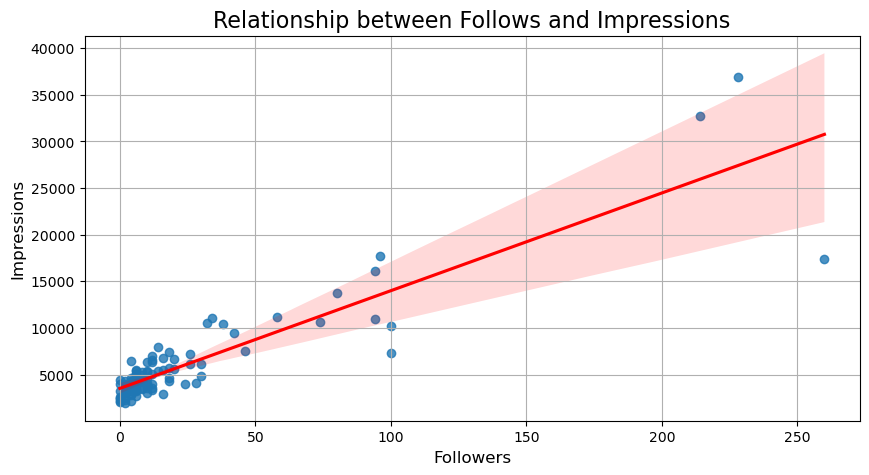

In [50]:
plt.figure(figsize=(10,5))
sns.regplot(x='Follows', y='Impressions', data=df, line_kws={'color':'red'})


plt.title('Relationship between Follows and Impressions', fontsize=16)
plt.xlabel('Followers', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True)
plt.show()

 there is a strong positive relationship between the number of followers and impressions.

Relationship between Shares and Impressions

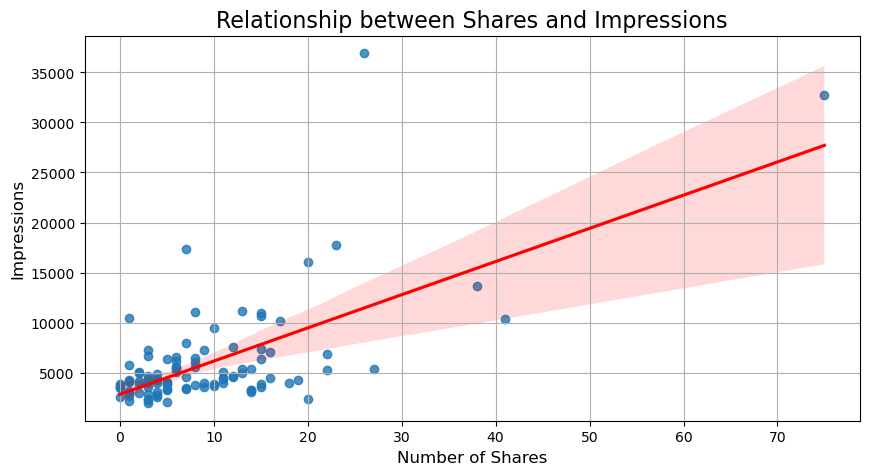

In [51]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shares', y='Impressions', data=df, line_kws={'color':'red'})


plt.title('Relationship between Shares and Impressions', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True)
plt.show()

there is a moderate to strong positive relationship between the number of shares and impressions.

Q5 - Which factor has the strongest impact on Impressions: Shares, Likes, or Comments, saves?<br>

In [52]:
source_columns = df[['Likes', 'Shares', 'Comments', 'Saves']]

target_column5 = df['Impressions']

correlations5 = source_columns.corrwith(target_column5)
sorted_correlations5 = correlations5.sort_values(ascending=False)

Text(0, 0.5, 'Factors')

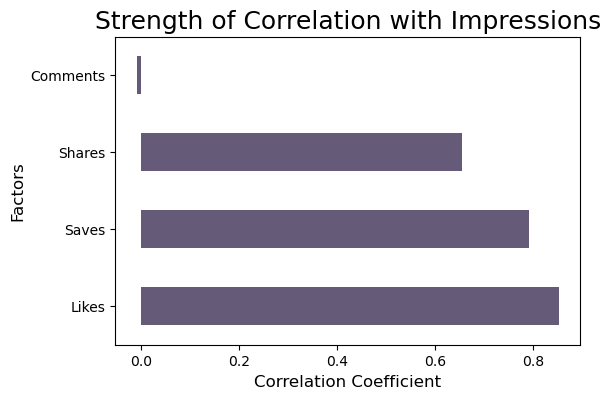

In [53]:
sorted_correlations5.plot(kind= 'barh',color= '#655B78', figsize=(6,4) )

plt.title('Strength of Correlation with Impressions', fontsize=18)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Factors', fontsize=12)

likes have the strongest impact on impressions 

Does Hashtags count affects the Impressions?

<Axes: >

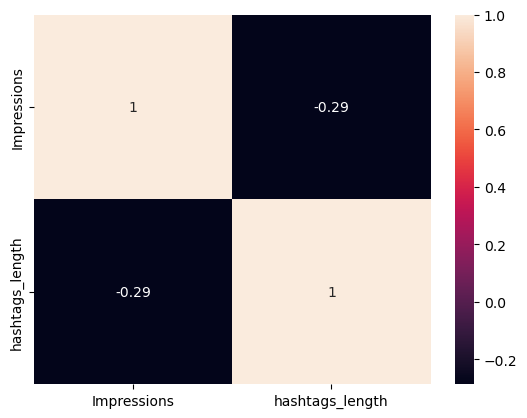

In [54]:
sns.heatmap(df[['Impressions','hashtags_length']].corr(),annot = True)

The correlation coefficient of -0.29 indicates a weak negative relationship between 'Impressions' and 'hashtags_length'

In [55]:
df_hashtags =df.groupby(df['hashtags_length'])['Impressions'].mean().reset_index()

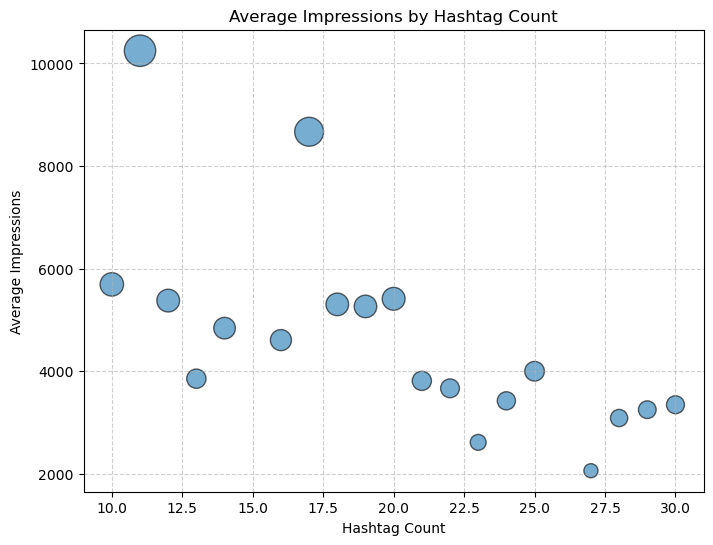

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_hashtags['hashtags_length'],
    df_hashtags['Impressions'],
    s=df_hashtags['Impressions']/20, 
    alpha=0.6,
    edgecolors='black'
)
plt.title("Average Impressions by Hashtag Count")
plt.xlabel("Hashtag Count")
plt.ylabel("Average Impressions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Does Caption count affects the Impressions?

<Axes: >

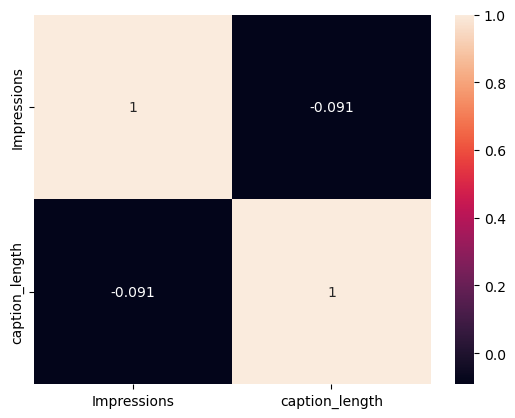

In [57]:
sns.heatmap(df[['Impressions','caption_length']].corr(),annot = True)

The correlation coefficient of -0.091 indicates that there is no meaningful linear relationship between 'Impressions' and 'caption_length'.

Does impressions effects engagements rate 

<Axes: >

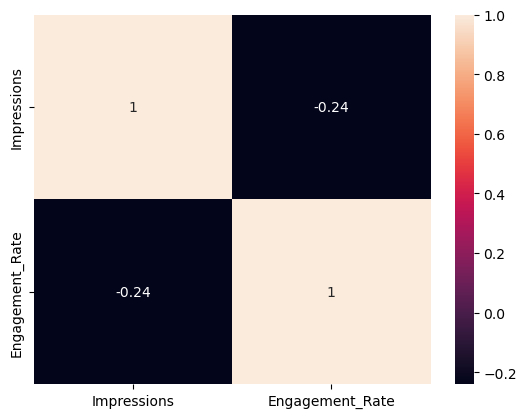

In [58]:
sns.heatmap(df[['Impressions','Engagement_Rate']].corr(),annot = True)

The correlation coefficient of -0.091 indicates that there is no meaningful linear relationship between 'Impressions' and 'caption_length'.

Relationship between Saves and Profile Visits

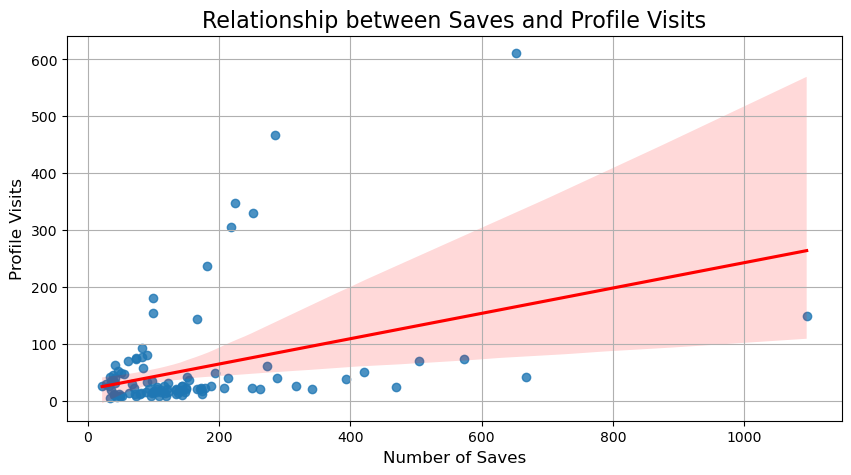

In [59]:
plt.figure(figsize=(10,5))
sns.regplot(x='Saves', y='Profile Visits', data=df, line_kws={'color':'red'})


plt.title('Relationship between Saves and Profile Visits', fontsize=16)
plt.xlabel('Number of Saves', fontsize=12)
plt.ylabel('Profile Visits', fontsize=12)
plt.grid(True)
plt.show()

there is a weak to moderate positive relationship between the number of saves and profile visits.

Relationship between Saves and Number of Followers

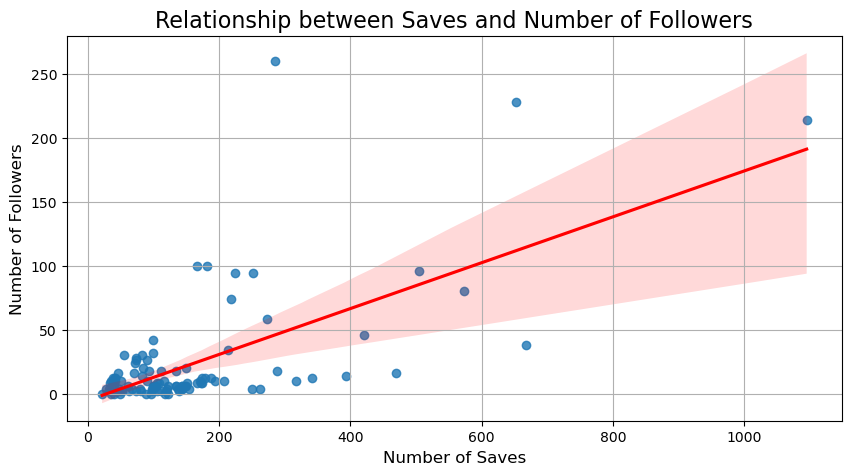

In [60]:
plt.figure(figsize=(10,5))
sns.regplot(x='Saves', y='Follows', data=df, line_kws={'color':'red'})


plt.title('Relationship between Saves and Number of Followers', fontsize=16)
plt.xlabel('Number of Saves', fontsize=12)
plt.ylabel('Number of Followers', fontsize=12)
plt.grid(True)
plt.show()

there is a moderate positive relationship between the number of saves and the number of followers gained.

Relationship between Shares and likes

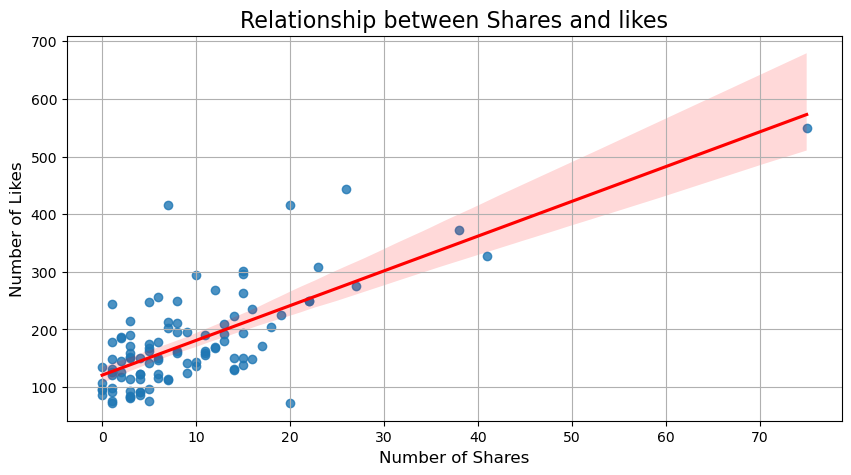

In [61]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shares', y='Likes', data=df, line_kws={'color':'red'})


plt.title('Relationship between Shares and likes', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)
plt.grid(True)
plt.show()

there is a moderate to strong positive relationship between the number of shares and the number of likes.

Relationship between Shares and Saves

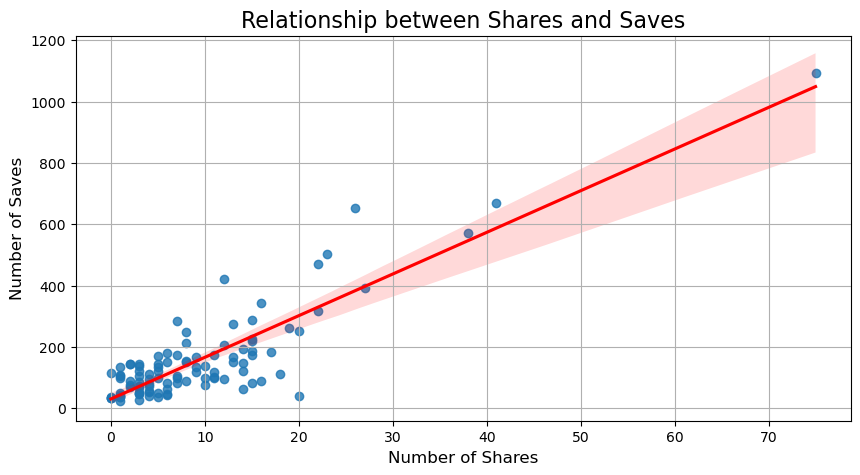

In [62]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shares', y='Saves', data=df, line_kws={'color':'red'})


plt.title('Relationship between Shares and Saves', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Number of Saves', fontsize=12)
plt.grid(True)
plt.show()

there is a moderate to strong positive relationship between the number of shares and the number of saves.

Relationship between Shares and Profile Visits

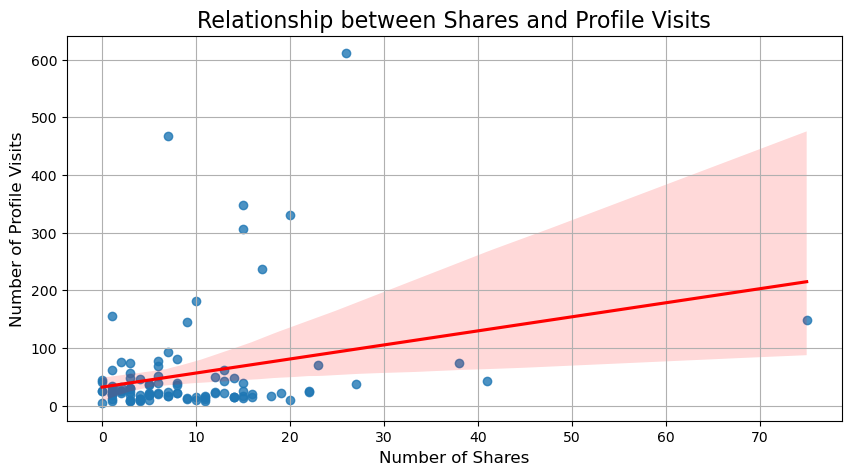

In [63]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shares', y='Profile Visits', data=df, line_kws={'color':'red'})


plt.title('Relationship between Shares and Profile Visits', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Number of Profile Visits', fontsize=12)
plt.grid(True)
plt.show()

there is a weak positive relationship between the number of shares and the number of profile visits.

Relationship between Shares and Follows

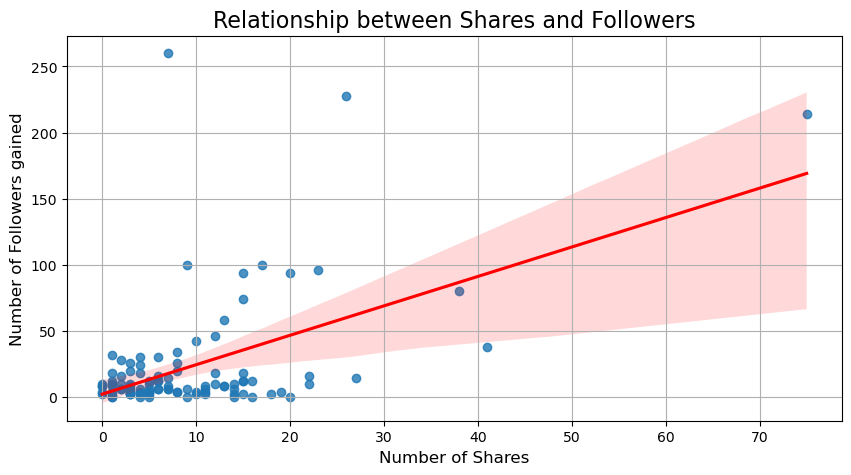

In [64]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shares', y='Follows', data=df, line_kws={'color':'red'})


plt.title('Relationship between Shares and Followers', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Number of Followers gained', fontsize=12)
plt.grid(True)
plt.show()

there is a moderate positive relationship between the number of shares and the number of followers gained.

Q12 - Is there any relationship between likes and source ?


In [65]:
source_columns = df[['From Home', 'From Explore', 'From Hashtags', 'From Other']]

target_column = df['Likes']

correlations = source_columns.corrwith(target_column)
sorted_correlations = correlations.sort_values(ascending=False)
corr_df = pd.DataFrame(sorted_correlations, columns=['Correlation'])

Text(0.5, 1.0, 'Heatmap of source correlation with likes ')

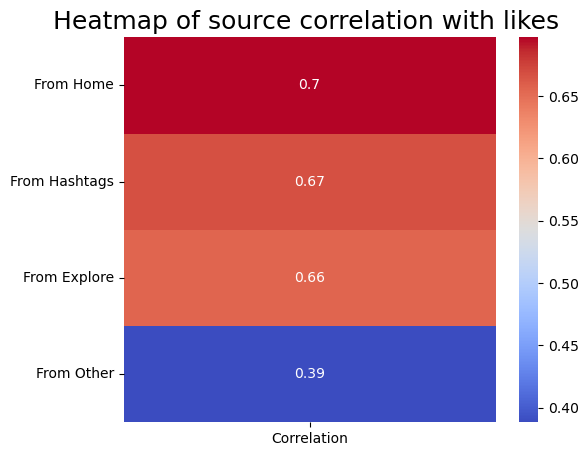

In [66]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df,cmap='coolwarm', annot=True)

plt.title('Heatmap of source correlation with likes ', fontsize=18)

From Home: Has the strongest positive correlation (0.7) with likes

From Hashtags: Also has a strong positive correlation (0.67) with likes

From Explore: Has a strong positive correlation as well (0.66), nearly identical to the impact from hashtags with likes

From Other: Has the weakest positive correlation (0.39) with likes

Q13 - Is there any relationship between saves and source ?


In [67]:
source_columns = df[['From Home', 'From Explore', 'From Hashtags', 'From Other']]

target_column_1 = df['Saves']

correlations_1 = source_columns.corrwith(target_column_1)
sorted_correlations_1 = correlations_1.sort_values(ascending=False)
corr_df_1 = pd.DataFrame(sorted_correlations_1, columns=['Correlation'])

Text(0.5, 1.0, 'Heatmap of source correlation with saves ')

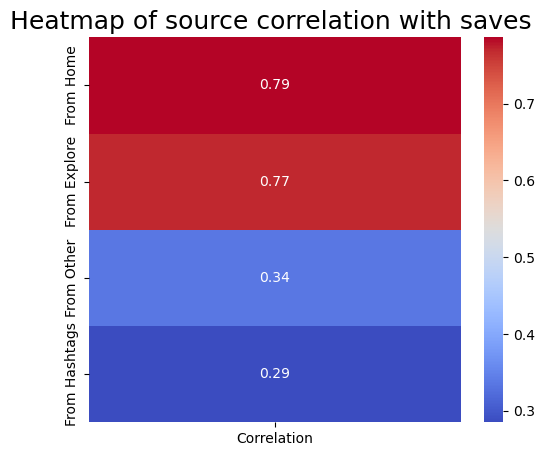

In [68]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df_1,cmap='coolwarm', annot=True)

plt.title('Heatmap of source correlation with saves ', fontsize=18)

Impressions "From Home" have the strongest positive correlation with saves, showing a coefficient of 0.79. Impressions "From Explore" are a very close second with a strong positive correlation of 0.77.

The other sources have a much weaker impact:

Impressions "From Other" have a weak-to-moderate positive correlation of 0.34.

Impressions "From Hashtags" have the weakest positive correlation at 0.29.

In summary, impressions from the Home and Explore feeds are the strongest indicators that a user will save a post.

Q14 - Is there any relationship between Profile Visits and source ?

In [69]:
source_columns = df[['From Home', 'From Explore', 'From Hashtags', 'From Other']]

target_column_2 = df['Profile Visits']

correlations_2 = source_columns.corrwith(target_column_2)
sorted_correlations_2 = correlations_2.sort_values(ascending=False)
corr_df_2 = pd.DataFrame(sorted_correlations_2, columns=['Correlation'])

Text(0.5, 1.0, 'Heatmap of source correlation with Profile visits ')

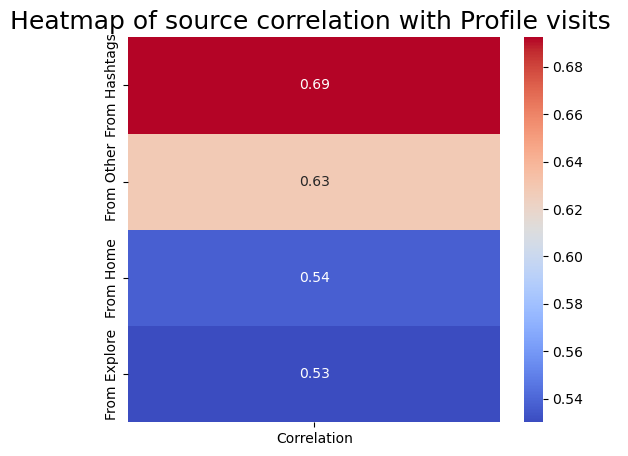

In [70]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df_2,cmap='coolwarm', annot=True)

plt.title('Heatmap of source correlation with Profile visits ', fontsize=18)

Impressions "From Hashtags" have the strongest positive correlation with profile visits, with a coefficient of 0.69. Impressions "From Other" also show a strong positive correlation at 0.63.

Impressions "From Home" (0.54) and "From Explore" (0.53) both have a moderate positive correlation with profile visits.

In summary, hashtags are the most effective source for driving profile visits, with 'other' sources also having a significant impact.

Q15 - Is there any relationship between Engagements and source ?

In [71]:
source_columns = df[['From Home', 'From Explore', 'From Hashtags', 'From Other']]

target_column3 = df['Engagement']

correlations3 = source_columns.corrwith(target_column3)
sorted_correlations3 = correlations3.sort_values(ascending=False)
corr_df3 = pd.DataFrame(sorted_correlations3, columns=['Correlation'])

Text(0.5, 1.0, 'Heatmap of source correlation with Engagements ')

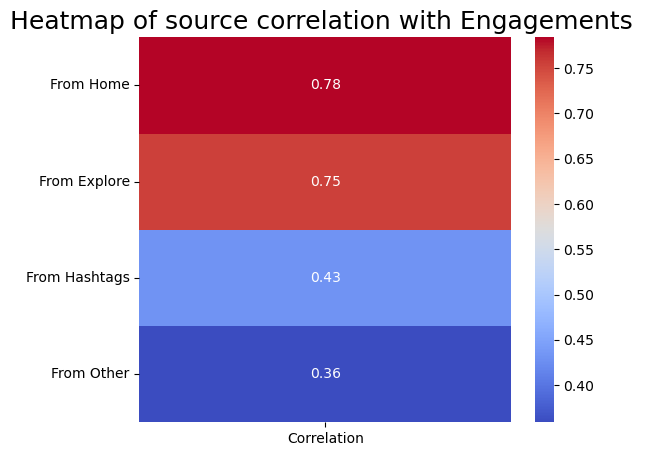

In [72]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df3,cmap='coolwarm', annot=True)

plt.title('Heatmap of source correlation with Engagements ', fontsize=18)

Impressions "From Home" (0.78) and "From Explore" (0.75) both have a strong positive correlation with engagements, making them the most impactful sources for driving user interaction.

Impressions "From Hashtags" have a moderate positive correlation at 0.43.

Impressions "From Other" show the weakest positive correlation at 0.36.

In summary, the Home and Explore feeds are the primary drivers of engagement for these posts.

Is there any relationship between shares and other matrics ?<br>
Is there any relationship between save and other matrics ? <br>
Is there any relationship between Likes and other matrics ? <br>

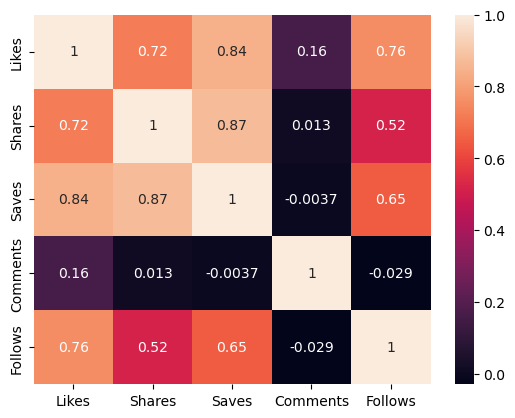

In [73]:
sns.heatmap(df[['Likes','Shares','Saves','Comments','Follows']].corr(),annot=True)
plt.show()

 Shares are strongly related to most other metrics, especially Saves.

Shares & Saves: A very strong positive correlation (0.87). This is the strongest relationship in the entire chart.

Shares & Likes: A strong positive correlation (0.72).

Shares & Follows: A moderate positive correlation (0.52).

Shares & Comments: No relationship (0.013).

Likes are also strongly correlated with other key engagement metrics.

Likes & Saves: A very strong positive correlation (0.84).

Likes & Follows: A strong positive correlation (0.76).

Likes & Shares: A strong positive correlation (0.72).

Likes & Comments: A very weak positive correlation (0.16).

Saves have very strong relationships with nearly every other metric except comments.

Saves & Shares: A very strong positive correlation (0.87).

Saves & Likes: A very strong positive correlation (0.84).

Saves & Follows: A strong positive correlation (0.65).

Saves & Comments: No relationship (-0.0037).

Does the Caption count affects the number of likes?

<Axes: >

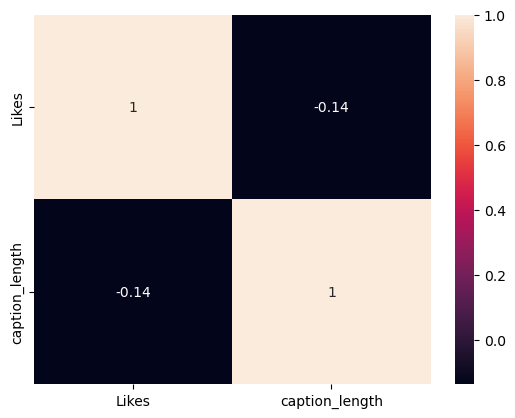

In [74]:
sns.heatmap(df[['Likes','caption_length']].corr(),annot = True)

The correlation coefficient of -0.14 indicates a very weak negative relationship. This means that while there is a very slight tendency for posts with shorter captions to get more likes, the connection is so weak that it is considered insignificant.

Does the Hashtags count affects the number of likes?

<Axes: >

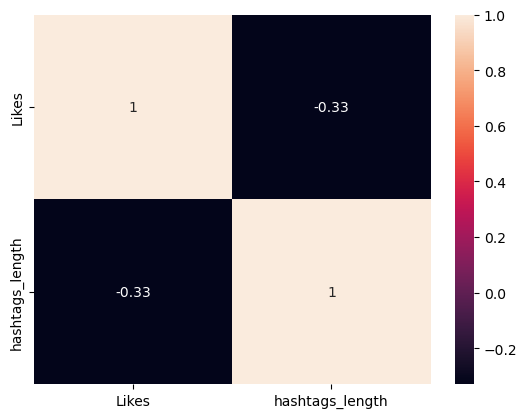

In [75]:
sns.heatmap(df[['Likes','hashtags_length']].corr(),annot = True)


the hashtag count has a weak to moderate negative effect on the number of likes.

The correlation coefficient is -0.33, which indicates that there is a noticeable tendency for posts with fewer hashtags to receive more likes.

## Insights & Business Recommendations

📌 Conclusion & Results  

1. **Top Performing Posts**  
   - Posts with the highest **likes, shares, and impressions** were mostly discovered through the **Explore feed**.  
   - Posts that brought the most **new followers** were discovered primarily through **Hashtags**.  
   - Saves were strongest when impressions came from **Home** and **Hashtags**, showing that loyal followers contribute significantly to deeper engagement.  

2. **Sources of Impressions**  
   - **Home** and **Hashtags** generated the highest number of impressions overall.  
   - However, **Explore** posts drove the **strongest engagement and profile visits**, making Explore a key source for discovery and interaction.  
   - **Hashtags** were the most effective source for driving **profile visits**, while **Home** and **Explore** were the strongest for driving **engagements**.  

3. **Relationships Between Metrics**  
   - **Likes** had the strongest impact on **Impressions**. There was a strong positive correlation between likes and impressions, followed closely by **Saves** and **Followers**.  
   - **Shares** showed a moderate to strong positive relationship with impressions, and were also strongly related to Saves (0.87), Likes (0.72), and Follows (0.52).  
   - **Saves** were highly connected to other metrics: strong positive correlations with Shares (0.87), Likes (0.84), and Follows (0.65).  
   - **Comments**, however, showed weak or no correlation with most metrics, meaning they are less reliable indicators of post success compared to Saves, Likes, or Shares.  

4. **Impact of Content Features**  
   - **Hashtag Count**: More hashtags did not guarantee higher performance. In fact, the correlation with impressions (-0.29) and likes (-0.33) was weak to moderately negative, suggesting that excessive hashtags may reduce engagement.  
   - **Caption Length**: There was almost no meaningful relationship between caption length and impressions (-0.091) or likes (-0.14). Longer captions did not necessarily increase visibility or engagement.  

5. **Key Business Insights**  
   - Focus on optimizing content for **Explore** and **Home** feeds, as they are the biggest drivers of impressions and engagement.  
   - Develop a **smart hashtag strategy**: too many hashtags can actually reduce likes and impressions. A smaller, targeted set of hashtags is more effective.  
   - Prioritize **Likes, Saves, and Shares** as the main KPIs — these metrics are highly correlated and directly tied to visibility and growth.  
   - Comments should not be the sole measure of engagement, as they provide weaker insights compared to other actions.  

---

💡 **Final Thought**: Sustainable growth on Instagram comes from a balance between **discoverability** (through Explore and effective hashtag use) and **quality engagement** (Likes, Saves, Shares). By prioritizing these areas, an account can maximize both reach and meaningful user interaction.  
